In [ ]:
# @title Texto de título predeterminado
# Obtenemos los datos (sustituyendo los valores NaN por 0)
import pandas as pd
import json

# Función que convierte json a DataFrame
def process_json(content, region_name):
  with open(content, "r") as file:
    bd = json.load(file)
  bd = pd.DataFrame(bd)
  bd=bd.fillna(0)
  bd["region"] = region_name
  # Extrae año y mes
  bd["año"]=bd["fecha"].str.split("-").str[0].astype(int)
  bd["mes"]=bd["fecha"].str.split("-").str[1].astype(int)
  # Filtra meses válidos (1 a 12)
  bd = bd[(bd["mes"] >= 1) & (bd["mes"] <= 12)]
  # Limpia y converte las temperaturas
  bd["ta_max"] = pd.to_numeric(bd["ta_max"].str.extract(r"([\d.]+)")[0], errors='coerce')
  bd["ta_min"] = pd.to_numeric(bd["ta_min"].str.extract(r"([\d.]+)")[0], errors='coerce')
  bd["tm_max"] = pd.to_numeric(bd["tm_max"].str.extract(r"([\d.]+)")[0], errors='coerce')
  # Ordena por año y mes correctamente
  bd = bd.sort_values(by=["año", "mes"], ascending=True)
  return bd

datos_madrid=process_json("/content/sample_data/madrid_bd.json", "Madrid")
datos_asturias=process_json("/content/sample_data/asturias_bd.json", "Asturias")
datos_sevilla=process_json("/content/sample_data/sevilla_bd.json", "Sevilla")
datos_madrid.head()
datos_sevilla.head()
datos_asturias.head()

,fecha,indicativo,p_max,n_cub,hr,n_gra,n_fog,inso,q_max,nw_55,...,ti_max,n_nie,tm_mes,tm_max,nv_0100,q_min,np_010,region,año,mes
4,2004-1,1212E,18.9(25),11,75,0,3,2.3,1016.7(18),10,...,9.1,0,11.0,14.6,0,989.0(26),15,Asturias,2004,1
5,2004-2,1212E,23.8(26),9,74,2,0,4.2,1018.2(07),3,...,5.3,1,9.1,12.9,0,982.7(21),7,Asturias,2004,2
6,2004-3,1212E,21.1(23),10,78,1,0,4.1,1017.5(18),2,...,8.8,1,9.4,13.3,0,983.2(31),13,Asturias,2004,3
7,2004-4,1212E,15.7(29),7,79,1,5,5.5,1013.9(04),5,...,10.4,0,10.8,14.5,0,981.4(01),10,Asturias,2004,4
8,2004-5,1212E,15.7(04),10,92,0,2,5.7,1010.6(29),3,...,12.2,0,13.0,16.4,0,984.2(05),11,Asturias,2004,5


In [ ]:
# @title Texto de título predeterminado
# Clasificación por años
import pandas as pd

def createBasket(year,data):

    data['fecha'] = pd.to_datetime(data['fecha'], format='%Y-%m', errors='coerce')

    data_year = data[data['fecha'].dt.year == year].copy()
    data_year['p_mes'] = pd.to_numeric(data_year['p_mes'], errors='coerce').fillna(0)
    return data_year

year2004=createBasket(2004,datos_madrid)
year2005=createBasket(2005,datos_madrid)
year2006=createBasket(2006,datos_madrid)
year2007=createBasket(2007,datos_madrid)
year2008=createBasket(2008,datos_madrid)
year2009=createBasket(2009,datos_madrid)
year2010=createBasket(2010,datos_madrid)
year2011=createBasket(2011,datos_madrid)
year2012=createBasket(2012,datos_madrid)
year2013=createBasket(2013,datos_madrid)
year2014=createBasket(2014,datos_madrid)
year2015=createBasket(2015,datos_madrid)
year2016=createBasket(2016,datos_madrid)
year2017=createBasket(2017,datos_madrid)
year2018=createBasket(2018,datos_madrid)
year2019=createBasket(2019,datos_madrid)
year2020=createBasket(2020,datos_madrid)
year2021=createBasket(2021,datos_madrid)
year2022=createBasket(2022,datos_madrid)
year2023=createBasket(2023,datos_madrid)
year2024=createBasket(2024,datos_madrid)
year2004

,fecha,indicativo,p_max,n_cub,hr,n_gra,n_fog,inso,q_max,nw_55,...,n_nie,tm_mes,tm_max,nv_0100,q_min,np_010,glo,region,año,mes
4,2004-01-01,3129,3.5(31),7,74,0,5,5.4,960.9(10),2,...,0,6.1,11.5,1,941.0(27),1,0,Madrid,2004,1
5,2004-02-01,3129,20.6(25),6,69,0,2,5.9,967.9(04),2,...,0,6.6,12.4,0,926.5(21),6,0,Madrid,2004,2
6,2004-03-01,3129,25.9(29),8,63,0,0,5.9,963.8(03),1,...,1,8.2,13.6,0,934.7(29),6,0,Madrid,2004,3
7,2004-04-01,3129,16.8(28),4,57,0,0,8.3,960.9(03),2,...,0,11.0,17.2,0,933.3(29),6,0,Madrid,2004,4
8,2004-05-01,3129,24.8(02),8,60,0,0,7.7,958.6(19),1,...,0,14.2,19.8,0,931.7(03),11,0,Madrid,2004,5
9,2004-06-01,3129,5.6(07),0,37,0,0,12.9,956.9(14),3,...,0,23.1,31.3,0,941.1(18),2,0,Madrid,2004,6
10,2004-07-01,3129,8.7(06),0,30,0,0,12.5,956.2(24),7,...,0,25.0,33.4,0,941.4(06),2,0,Madrid,2004,7
11,2004-08-01,3129,17.7(17),1,37,0,0,10.9,955.3(21),12,...,0,23.9,31.3,0,940.2(08),3,0,Madrid,2004,8
12,2004-09-01,3129,6.8(03),2,39,0,0,10.3,957.7(22),6,...,0,21.7,29.6,0,943.4(01),1,0,Madrid,2004,9
0,2004-10-01,3129,28.0(25),6,59,0,0,6.4,956.6(02),8,...,0,15.3,21.0,0,931.9(27),10,0,Madrid,2004,10


In [ ]:
# Estudio de los datos
# 1.- Vamos a estudiar la evolución de la lluvia y temperatura de los anteriores años
# Lluvia:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def graphicRainByMonthMaker(year):
  year.loc[:,"fecha"]=pd.to_datetime(year["fecha"])
  year.loc[:,"mes"]=year["fecha"].dt.month
  rain=year.groupby("mes")["p_mes"].sum()
  plt.figure(figsize=(10,6))
  sns.barplot(x=rain.index, y=rain.values, palette="Blues_d")
  plt.xlabel("mes")
  plt.ylabel("p_mes")
  yearName=year["fecha"].dt.year.iloc[0]
  plt.title("Precipitaciones en "+str(yearName))
  plt.xticks(ticks=range(12), labels=["Enero","Febrero","Marzo","Abril","Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],rotation=45)
  plt.show()

def graphicEvolutionRain(year):
  year["fecha"] = pd.to_datetime(year["fecha"])
  year["Años"] = year["fecha"].dt.year
  rain = year.groupby("Años")["p_mes"].sum()

  # Crear índice completo de años 2004-2024
  full_years = pd.Series(index=range(2004, 2025), dtype=float)
  rain = full_years.add(rain, fill_value=0)

  # Gráfico de barras
  plt.figure(figsize=(12, 6))
  sns.barplot(x=rain.index, y=rain.values, palette="Blues_d")
  plt.xlabel("Año")
  plt.ylabel("Precipitación total (mm)")
  plt.title("Precipitaciones anuales (2004–2024)")
  plt.xticks(rotation=45)
  plt.show()

  # Gráfico de líneas
  plt.figure(figsize=(12, 6))
  sns.lineplot(x=rain.index.astype(str), y=rain.values, marker="o", color="blue", linewidth=2.5)
  plt.xlabel("Año")
  plt.ylabel("Precipitación total (mm)")
  plt.title("Evolución anual de precipitaciones (2004–2024)")

  # Anotar cada punto
  for i, val in enumerate(rain.values):
      plt.text(i, val + 10, f"{val:.1f}", ha="center", fontsize=9)

  plt.xticks(rotation=45)
  plt.show()

years=[year2004,year2005,year2006,year2007,year2008,
       year2009,year2010,year2011,year2012,year2013,
       year2014,year2015,year2016,year2017,year2018,
       year2019,year2020,year2021,year2022,year2023,year2024]

# Gráfica de cada año
for year in years:
  graphicRainByMonthMaker(year)

# Gráfica evolución de todos los años (desde 2004 al 2024)
all_years_df = pd.concat(years, ignore_index=True)
graphicEvolutionRain(all_years_df)
# Temperatura:

def graphicTempByMonthMaker(year):
  year.loc[:,"fecha"]=pd.to_datetime(year["fecha"])
  year.loc[:,"mes"]=year["fecha"].dt.month


  temp=year.groupby("mes")[["ta_max", "ta_min"]].mean().reset_index()
  temp_melted = temp.melt(id_vars="mes", var_name="Tipo", value_name="Temperatura")
  plt.figure(figsize=(10,6))
  sns.barplot(x="mes", y="Temperatura", hue="Tipo", data=temp_melted, palette=["#FF9999", "#AEC6CF"])
  plt.xlabel("mes")
  plt.ylabel("Temperatura  (ºC)")
  yearName=year["fecha"].dt.year.iloc[0]
  plt.title(f"Temperaturas Máximas y Mínimas en {yearName}")
  plt.xticks(ticks=range(12), labels=["Enero","Febrero","Marzo","Abril","Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],rotation=45)
  plt.show()

  plt.figure(figsize=(10,6))
  sns.lineplot(
        x="mes",
        y="Temperatura",
        hue="Tipo",
        data=temp_melted,
        palette=["#FF6961", "#99C1DE"],
        marker="o",
        linewidth=2.5,
        markersize=8,
        dashes=False
    )

  for mes in temp["mes"]:
    max_temp = temp.loc[temp["mes"] == mes, "ta_max"].values[0]
    min_temp = temp.loc[temp["mes"] == mes, "ta_min"].values[0]
    plt.text(mes, max_temp + 0.3, f'{max_temp:.1f}', ha='right', color="#FF6961")
    plt.text(mes, min_temp - 0.5, f'{min_temp:.1f}', ha='right', color="#99C1DE")


def graphicEvolutionTemps(year):
  year.loc[:,"fecha"]=pd.to_datetime(year["fecha"])
  year.loc[:,"año"]=year["fecha"].dt.year
  temp=year.groupby("año")[["ta_max", "ta_min"]].mean().reset_index()
  temp_melted = temp.melt(id_vars="año", var_name="Tipo", value_name="Temperatura")
  plt.figure(figsize=(10,6))
  sns.barplot(x="año", y="Temperatura", hue="Tipo", data=temp_melted, palette=["#FF9999", "#AEC6CF"])
  plt.xlabel("año")
  plt.ylabel("Temperatura  (ºC)")
  yearName=year["fecha"].dt.year.iloc[0]
  plt.title(f"Temperaturas desde {temp.index.min()} hasta {temp.index.max()}")
  plt.xticks(ticks=range(21), labels=["2004","2005","2006","2007",
                                      "2008","2009","2010","2011",
                                      "2012","2013", "2014", "2015",
                                      "2016","2017", "2018", "2019", "2020",
                                      "2021","2022","2023","2024"],rotation=45)
  plt.show()

  # Gráfico de líneas (con eje categórico)
  plt.figure(figsize=(12, 6))
  sns.lineplot(
      x=temp_melted["año"].astype(str),  # convertir a texto para eje categórico
      y="Temperatura",
      hue="Tipo",
      data=temp_melted,
      palette=["#FF6961", "#99C1DE"],
      marker="o",
      linewidth=2.5,
      markersize=8,
      dashes=False
  )
  plt.xlabel("Año")
  plt.ylabel("Temperatura (ºC)")
  plt.title(f"Evolución anual de temperaturas (2004–2024)")
  plt.xticks(rotation=45)

  # Añadir anotaciones
  for año in temp["año"]:
      max_temp = temp.loc[temp["año"] == año, "ta_max"].values[0]
      min_temp = temp.loc[temp["año"] == año, "ta_min"].values[0]
      plt.text(str(año), max_temp + 0.3, f'{max_temp:.1f}', ha='center', color="#FF6961")
      plt.text(str(año), min_temp - 0.5, f'{min_temp:.1f}', ha='center', color="#99C1DE")

  plt.show()


# Gráfica de cada año
for year in years:
  graphicTempByMonthMaker(year)

# Gráfica de evolución de los años (de 2004 al 2024)
all_years_temp=pd.concat(years, ignore_index=True)
graphicEvolutionTemps(all_years_temp)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
import numpy as np

# Unir todos los años en un solo DataFrame
all_years_df = pd.concat(years, ignore_index=True)

# Convertir fecha y extraer año
all_years_df["fecha"] = pd.to_datetime(all_years_df["fecha"])
all_years_df["año"] = all_years_df["fecha"].dt.year

# Calcular temperatura media diaria
all_years_df["T. Media"] = (all_years_df["ta_max"] + all_years_df["ta_min"]) / 2
all_years_df["Nivel lluvia"] = all_years_df["p_mes"]

# Agrupar por año
df_yearly_temp = all_years_df.groupby("año").agg({
    "T. Media": "mean"
}).reset_index()

df_yearly_rain = all_years_df.groupby("año").agg({
    "Nivel lluvia": "sum"
}).reset_index()

# Clasificación por percentiles (etiquetado manual)
# Temperatura: 0 = frío, 1 = normal, 2 = cálido
percentil_33_temp = df_yearly_temp["T. Media"].quantile(0.33)
percentil_66_temp = df_yearly_temp["T. Media"].quantile(0.66)

df_yearly_temp["Clase Temperatura"] = np.select([
    df_yearly_temp["T. Media"] < percentil_33_temp,
    (df_yearly_temp["T. Media"] >= percentil_33_temp) & (df_yearly_temp["T. Media"] <= percentil_66_temp),
    df_yearly_temp["T. Media"] > percentil_66_temp
], [0, 1, 2])

# Lluvia: 0 = seco, 1 = normal, 2 = lluvioso
percentil_33_rain = df_yearly_rain["Nivel lluvia"].quantile(0.33)
percentil_66_rain = df_yearly_rain["Nivel lluvia"].quantile(0.66)

df_yearly_rain["Clase Lluvia"] = np.select([
    df_yearly_rain["Nivel lluvia"] < percentil_33_rain,
    (df_yearly_rain["Nivel lluvia"] >= percentil_33_rain) & (df_yearly_rain["Nivel lluvia"] <= percentil_66_rain),
    df_yearly_rain["Nivel lluvia"] > percentil_66_rain
], [0, 1, 2])

# Mostrar resultados
print("\n🔹 Clasificación de Años según la temperatura:\n", df_yearly_temp[["año", "T. Media", "Clase Temperatura"]])
print("\n🔹 Clasificación de Años según el nivel de precipitación:\n", df_yearly_rain[["año", "Nivel lluvia", "Clase Lluvia"]])



🔹 Clasificación de Años según la temperatura:
      año   T. Media  Clase Temperatura
0   2004  16.458333                  0
1   2005  17.745833                  2
2   2006  17.754167                  2
3   2007  16.712500                  0
4   2008  16.812500                  1
5   2009  17.541667                  2
6   2010  16.462500                  0
7   2011  16.779167                  1
8   2012  16.825000                  1
9   2013  16.254167                  0
10  2014  17.095833                  1
11  2015  17.583333                  2
12  2016  16.629167                  0
13  2017  17.216667                  1
14  2018  16.604167                  0
15  2019  17.266667                  2
16  2020  16.679167                  0
17  2021  17.041667                  1
18  2022  17.441667                  2
19  2023  18.000000                  2
20  2024  17.254167                  1

🔹 Clasificación de Años según el nivel de precipitación:
      año  Nivel lluvia  Clase Lluvi

Loading monthly data from: /content/sample_data/clehret1.xls, sheet: Retiro
Successfully read columns from /content/sample_data/clehret1.xls, sheet Retiro
Dropped 20 rows with NaNs in key columns for /content/sample_data/clehret1.xls
Dropped 0 rows with conversion errors (año/mes) for /content/sample_data/clehret1.xls
Dropped 0 duplicate index rows for /content/sample_data/clehret1.xls
Finished processing /content/sample_data/clehret1.xls. Final Shape: (1092, 1)
Loading monthly data from: /content/sample_data/clbat1.xls, sheet: Barajas
Successfully read columns from /content/sample_data/clbat1.xls, sheet Barajas
Dropped 13 rows with NaNs in key columns for /content/sample_data/clbat1.xls
Dropped 0 rows with conversion errors (año/mes) for /content/sample_data/clbat1.xls
Dropped 0 duplicate index rows for /content/sample_data/clbat1.xls
Finished processing /content/sample_data/clbat1.xls. Final Shape: (333, 1)
df_retiro empty: False
df_retiro length: 1092
df_retiro head:
            T_m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training on monthly data...
Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.1576 - val_loss: 0.0838
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0756 - val_loss: 0.0786
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0724 - val_loss: 0.0745
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0685 - val_loss: 0.0688
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0650 - val_loss: 0.0648
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0518 - val_loss: 0.0422
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0334 - val_loss: 0.0138
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0129 - val_loss: 0.0073
Epoch 9/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0110 - val_loss: 0.0055
Epoch 10/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0100 - val_loss: 0.0066
Epoch 11/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0108 - val_loss: 0.0050
Epoch 1

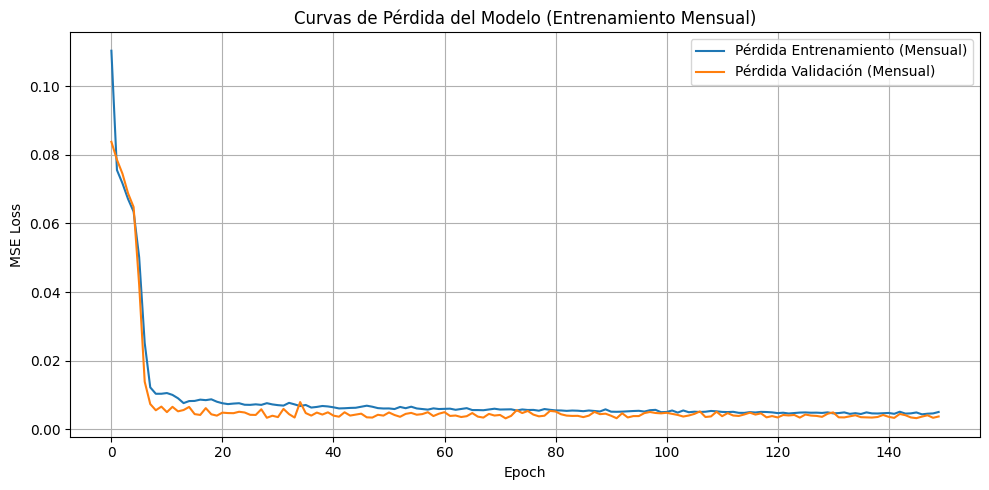

Pérdida (MSE) en validación mensual: 0.00369
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


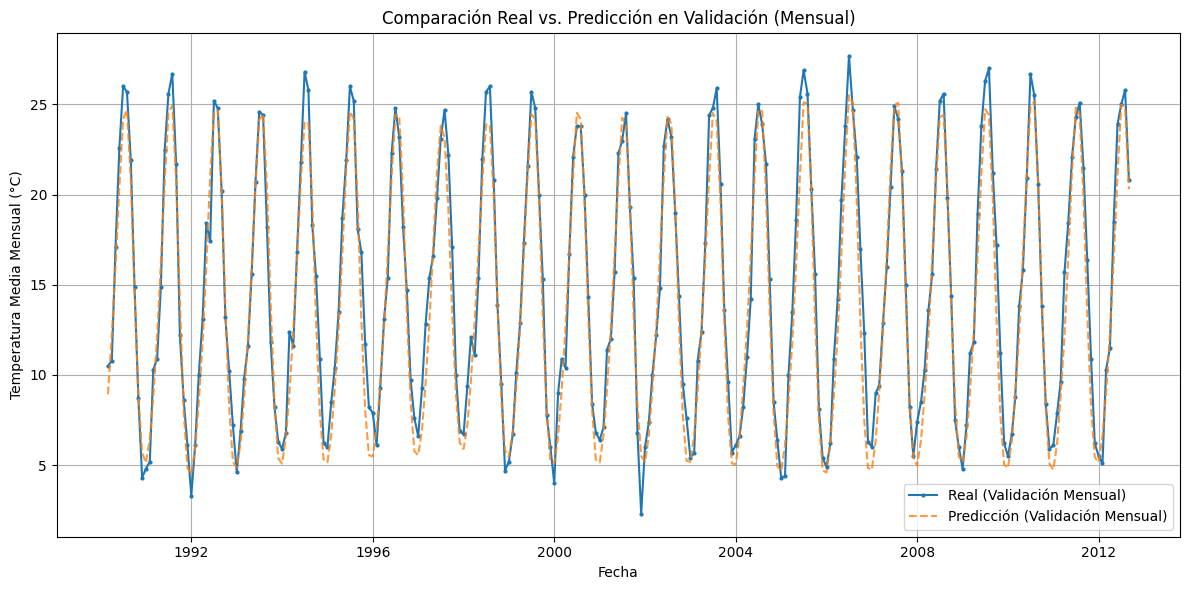


Generating monthly forecast for the next 50 years (600 months)...
Forecasted 1 year(s)...
Forecasted 2 year(s)...
Forecasted 3 year(s)...
Forecasted 4 year(s)...
Forecasted 5 year(s)...
Forecasted 6 year(s)...
Forecasted 7 year(s)...
Forecasted 8 year(s)...
Forecasted 9 year(s)...
Forecasted 10 year(s)...
Forecasted 11 year(s)...
Forecasted 12 year(s)...
Forecasted 13 year(s)...
Forecasted 14 year(s)...
Forecasted 15 year(s)...
Forecasted 16 year(s)...
Forecasted 17 year(s)...
Forecasted 18 year(s)...
Forecasted 19 year(s)...
Forecasted 20 year(s)...
Forecasted 21 year(s)...
Forecasted 22 year(s)...
Forecasted 23 year(s)...
Forecasted 24 year(s)...
Forecasted 25 year(s)...
Forecasted 26 year(s)...
Forecasted 27 year(s)...
Forecasted 28 year(s)...
Forecasted 29 year(s)...
Forecasted 30 year(s)...
Forecasted 31 year(s)...
Forecasted 32 year(s)...
Forecasted 33 year(s)...
Forecasted 34 year(s)...
Forecasted 35 year(s)...
Forecasted 36 year(s)...
Forecasted 37 year(s)...
Forecasted 38 yea

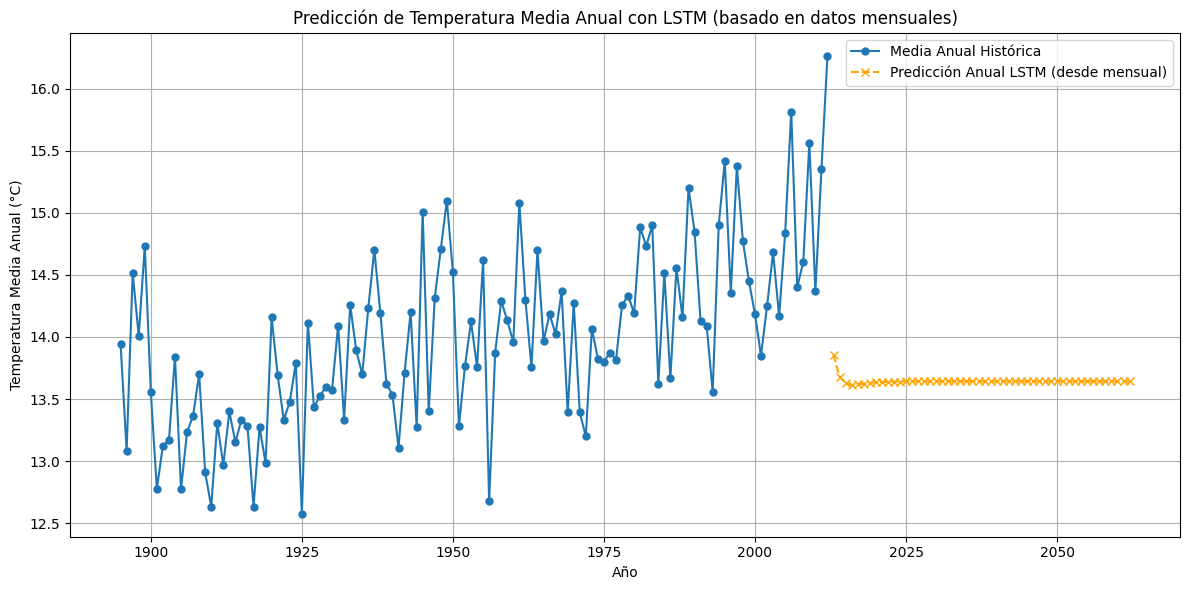

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def load_process_monthly(path: str, sheet_name: str, skiprows: int) -> pd.DataFrame:
    """
    Carga datos de temperatura MENSUALES desde un .xls, limpia y prepara.
    """
    print(f"Loading monthly data from: {path}, sheet: {sheet_name}")

    df = pd.read_excel(
        path,
        sheet_name=sheet_name,
        skiprows=skiprows,
        engine='xlrd',
        usecols=['Año', 'Mes', 'Temperatura Media (1)']
    )
    print(f"Successfully read columns from {path}, sheet {sheet_name}")

    # Renombrar columnas
    df = df.rename(columns={
        'Año': 'año',
        'Mes': 'mes_nombre',
        'Temperatura Media (1)': 'T_media_mensual'
    })

    # Limpieza inicial: elimina filas donde falten datos clave
    initial_rows = len(df)
    df = df.dropna(subset=['año', 'mes_nombre', 'T_media_mensual'])
    print(f"Dropped {initial_rows - len(df)} rows with NaNs in key columns for {path}")

    # Convertir 'año' a entero
    df['año'] = pd.to_numeric(df['año'], errors='coerce').astype('Int64')

    # Mapear nombres de mes a números
    mes_map = {
        'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
        'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
    }
    df['mes_num'] = df['mes_nombre'].map(mes_map).astype('Int64')

    # Elimina filas donde el año o mes no se pudo convertir
    initial_rows = len(df)
    df = df.dropna(subset=['año', 'mes_num'])
    print(f"Dropped {initial_rows - len(df)} rows with conversion errors (año/mes) for {path}")

    # Crea un índice de fecha/hora
    df['fecha'] = pd.to_datetime(df['año'].astype(str) + '-' + df['mes_num'].astype(str) + '-01', errors='coerce')

    df = df.set_index('fecha')

    # Limpiar y convertir temperatura mensual
    df['T_media_mensual'] = (
        df['T_media_mensual']
        .astype(str)
        .str.replace(',', '.')
        .astype(float)
    )

    # Selecciona y ordena
    df_out = df[['T_media_mensual']].sort_index()

    # Elimina duplicados (quedarse con el primero si hay error en los datos)
    initial_rows = len(df_out)
    df_out = df_out[~df_out.index.duplicated(keep='first')]
    print(f"Dropped {initial_rows - len(df_out)} duplicate index rows for {path}")


    # Rellena posibles meses faltantes con NaN para tener una serie temporal continua
    full_range = pd.date_range(start=df_out.index.min(), end=df_out.index.max(), freq='MS')
    df_out = df_out.reindex(full_range)

    print(f"Finished processing {path}. Final Shape: {df_out.shape}")
    return df_out

# BD
retiro_path = '/content/sample_data/clehret1.xls'
barajas_path = '/content/sample_data/clbat1.xls'

skip_rows_value = 6
df_retiro = load_process_monthly(retiro_path, sheet_name='Retiro', skiprows=skip_rows_value)
df_barajas = load_process_monthly(barajas_path, sheet_name='Barajas', skiprows=skip_rows_value)

print(f"df_retiro empty: {df_retiro.empty}")
if not df_retiro.empty:
    print(f"df_retiro length: {len(df_retiro)}")
    print(f"df_retiro head:\n{df_retiro.head()}")
    print(f"df_retiro NaNs:\n{df_retiro.isna().sum()}")

print(f"\ndf_barajas empty: {df_barajas.empty}")
if not df_barajas.empty:
    print(f"df_barajas length: {len(df_barajas)}")
    print(f"df_barajas head:\n{df_barajas.head()}")
    print(f"df_barajas NaNs:\n{df_barajas.isna().sum()}")


# Combina los dataframes promediando por fecha
df_monthly = None

# Usa outer join para mantener todos los meses de ambas estaciones
df_combined = pd.concat([df_retiro, df_barajas], axis=1, join='outer')
# Calcula la media donde ambas estaciones tienen datos, mantener el valor si solo una tiene
df_monthly = pd.DataFrame(df_combined.mean(axis=1), columns=['T_media_mensual'])

print(f"\nShape before interpolation: {df_monthly.shape}")
print(f"NaNs before interpolation:\n{df_monthly.isna().sum()}")

# Opción 1: Interpolar linealmente los meses faltantes
df_monthly['T_media_mensual'] = df_monthly['T_media_mensual'].interpolate(method='linear')
print(f"\nShape after interpolation: {df_monthly.shape}")
print(f"NaNs after interpolation:\n{df_monthly.isna().sum()}")

# Opción 2: Eliminar filas con NaN restantes (si la interpolación no pudo llenar todo, ej. al principio/final)
initial_rows = len(df_monthly)
df_monthly = df_monthly.dropna()
print(f"Dropped {initial_rows - len(df_monthly)} rows with remaining NaNs (if any).")
print(f"\nShape after final dropna: {df_monthly.shape}")

print(f"\nFinal combined monthly data shape: {df_monthly.shape}")
print("Sample of final monthly data:")
print(df_monthly.head())
print(df_monthly.tail())

# Calcula media anual histórica
df_annual_hist = df_monthly.resample('YE').mean()
df_annual_hist = df_annual_hist.rename(columns={'T_media_mensual': 'T_media_anual'})
df_annual_hist['año'] = df_annual_hist.index.year
print("\nSample of calculated historical annual means:")
print(df_annual_hist.head())


# Preparación para LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_monthly[['T_media_mensual']])

# Construcción de ventanas en meses
# Usaremos 10 años de datos mensuales (120 meses) para predecir el siguiente mes
window_size_months = 12 * 5

if len(scaled_data) <= window_size_months:
     print(f"Error: Not enough monthly data ({len(scaled_data)} points) for window size {window_size_months}.")
     sys.exit("Deteniendo ejecución - datos insuficientes para ventana.")

X, y = [], []
for i in range(len(scaled_data) - window_size_months):
    X.append(scaled_data[i : i + window_size_months, 0]) # Input: 120 meses anteriores
    y.append(scaled_data[i + window_size_months, 0])    # Output: el mes siguiente

X = np.array(X)
y = np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

print(f"\nMonthly data shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")


# modelo LSTM
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(window_size_months, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

print("\nStarting model training on monthly data...")
# Ajustar epochs y batch_size según necesidad
epochs = 150
batch_size = 64

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val) if X_val.shape[0] > 0 else None,
    verbose=1
)

# Evaluar Entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento (Mensual)')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Pérdida Validación (Mensual)')
plt.title('Curvas de Pérdida del Modelo (Entrenamiento Mensual)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


val_loss = model.evaluate(X_val, y_val, verbose=0)
print(f"Pérdida (MSE) en validación mensual: {val_loss:.5f}")

# Grafica predicciones vs reales en validación (mensual)
y_pred_val_scaled = model.predict(X_val)
y_pred_val = scaler.inverse_transform(y_pred_val_scaled)
y_actual_val = scaler.inverse_transform(y_val.reshape(-1, 1))

# Obtiene fechas correspondientes a y_val
val_dates_start_index = split_index + window_size_months
val_dates = df_monthly.index[val_dates_start_index : val_dates_start_index + len(y_actual_val)]

plt.figure(figsize=(12, 6))
plt.plot(val_dates, y_actual_val, label='Real (Validación Mensual)', marker='.', markersize=4, linestyle='-')
plt.plot(val_dates, y_pred_val, label='Predicción (Validación Mensual)', linestyle='--', marker=None, alpha=0.8)
plt.title('Comparación Real vs. Predicción en Validación (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Media Mensual (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Predicción ANUAL futura (usando predicciones mensuales)
forecast_horizon_years = 50
n_future_months = forecast_horizon_years * 12

# Toma la última secuencia de datos históricos (escalados)
last_sequence_scaled = scaled_data[-window_size_months:]

monthly_preds_scaled = []
current_sequence = last_sequence_scaled.reshape(1, window_size_months, 1)

print(f"\nGenerating monthly forecast for the next {forecast_horizon_years} years ({n_future_months} months)...")
for i in range(n_future_months):
    # Predecir el siguiente mes
    next_pred_scaled = model.predict(current_sequence, verbose=0)[0, 0]
    monthly_preds_scaled.append(next_pred_scaled)

    # Crea la secuencia para la *siguiente* predicción
    # Obtiene los últimos (window_size - 1) puntos de la secuencia actual
    next_sequence_input_data = current_sequence[0, 1:, 0]
    # Añade la nueva predicción al final
    next_sequence_input_data = np.append(next_sequence_input_data, next_pred_scaled)
    # Reshape para que sea la entrada del modelo en el siguiente paso
    current_sequence = next_sequence_input_data.reshape(1, window_size_months, 1)

    if (i + 1) % 12 == 0:
        print(f"Forecasted { (i + 1) // 12 } year(s)...")


# Reescala las predicciones mensuales
monthly_preds = scaler.inverse_transform(np.array(monthly_preds_scaled).reshape(-1, 1)).flatten()

# Calcula las medias anuales a partir de las predicciones mensuales
last_hist_year = df_annual_hist['año'].iloc[-1]
future_years = np.arange(last_hist_year + 1, last_hist_year + 1 + forecast_horizon_years)

annual_preds = []
for i in range(forecast_horizon_years):
    start_idx = i * 12
    end_idx = start_idx + 12
    annual_mean = np.mean(monthly_preds[start_idx:end_idx])
    annual_preds.append(annual_mean)

# Crea DataFrame solo si annual_preds no está vacío

forecast_df_annual = pd.DataFrame({'Año': future_years[:len(annual_preds)], 'Predicción Anual (°C)': annual_preds})
print("\nForecasted Annual Means:")
print(forecast_df_annual)

# Visualización final (comparando medias anuales)
plt.figure(figsize=(12, 6))
# Usar los datos anuales históricos calculados a partir de los mensuales
plt.plot(df_annual_hist['año'], df_annual_hist['T_media_anual'], label='Media Anual Histórica', marker='o', markersize=5, linestyle='-')
plt.plot(forecast_df_annual['Año'], forecast_df_annual['Predicción Anual (°C)'],
          linestyle='--', color='orange', label='Predicción Anual LSTM (desde mensual)', marker='x')
plt.xlabel('Año')
plt.ylabel('Temperatura Media Anual (°C)')
plt.title('Predicción de Temperatura Media Anual con LSTM (basado en datos mensuales)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Attempting to load data with skiprows=6
Loading annual data from: /content/sample_data/clehret1.xls, sheet: Retiro
Finished processing /content/sample_data/clehret1.xls. Found 91 annual means.
Loading annual data from: /content/sample_data/clbat1.xls, sheet: Barajas
Finished processing /content/sample_data/clbat1.xls. Found 28 annual means.
Combining Retiro and Barajas annual data...

Final Annual Data shape: (118, 2)
    año   T. Media
0  1895  13.941667
1  1896  13.083333
2  1897  14.516667
3  1898  14.008333
4  1899  14.733333
      año   T. Media
113  2008  14.608333
114  2009  15.566667
115  2010  14.366667
116  2011  15.350000
117  2012  16.266667

Training Linear Regression model...
Modelo encontrado: T. Media = 0.0128 * (Año - 1895) + -11.0124

Forecasted Annual Means (Linear Regression):
2013    14.782612
2014    14.795426
2015    14.808240
2016    14.821054
2017    14.833868
2018    14.846683
2019    14.859497
2020    14.872311
2021    14.885125
2022    14.897939
2023    14.9

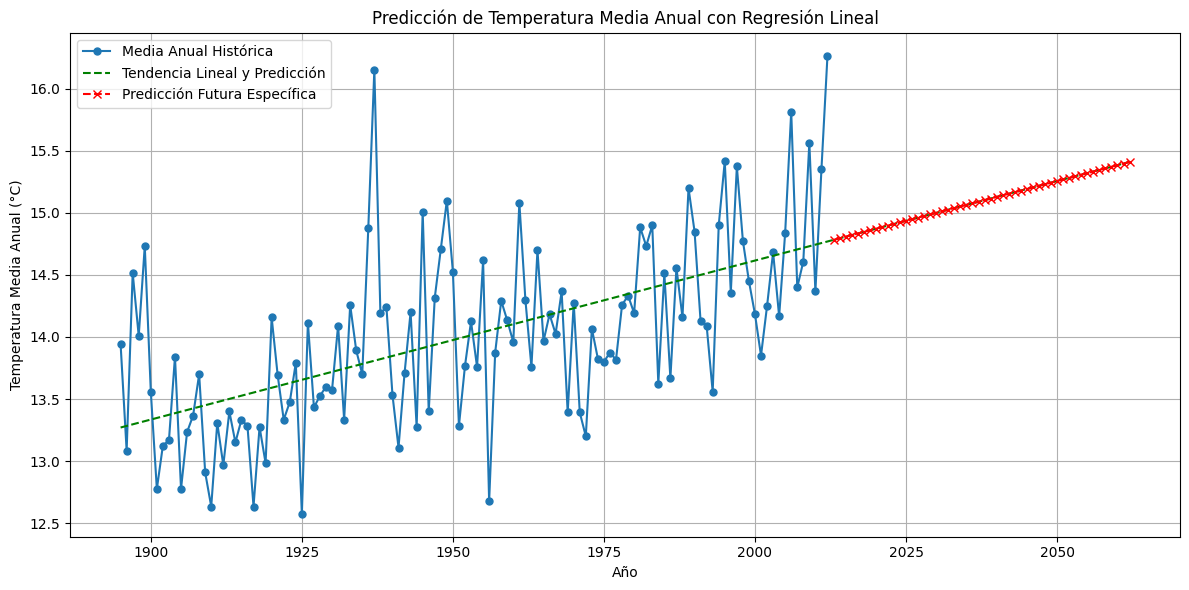

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
import sys

def dataClean(path: str, sheet_name: str, skiprows: int) -> pd.DataFrame:
    """
    Carga datos de temperatura desde un .xls, limpia y calcula media anual.
    """
    print(f"Loading annual data from: {path}, sheet: {sheet_name}")
    try:
        df = pd.read_excel(
            path,
            sheet_name=sheet_name,
            skiprows=skiprows,
            engine='xlrd',
            usecols=['Año', 'Temperatura Media (1)']
        )
    except FileNotFoundError:
        print(f"Error: File not found at {path}")
        return pd.DataFrame(columns=['año', 'T. Media'])
    except ValueError as e:
         print(f"Error reading {path}, sheet '{sheet_name}'. Check sheet name and columns.")
         print(f"Specific error: {e}")
         return pd.DataFrame(columns=['año', 'T. Media'])
    except Exception as e:
        print(f"An unexpected error occurred reading {path}: {e}")
        return pd.DataFrame(columns=['año', 'T. Media'])

    df = df.rename(columns={
        'Año': 'año',
        'Temperatura Media (1)': 'T_media_mensual'
    })

    df = df.dropna(subset=['año', 'T_media_mensual'])

    df['año'] = pd.to_numeric(df['año'], errors='coerce')
    df = df.dropna(subset=['año'])
    df['año'] = df['año'].astype(int)

    df['T_media_mensual'] = (
        df['T_media_mensual']
        .astype(str)
        .str.replace(',', '.')
        .astype(float)
    )

    # Media anual
    annual = (
        df
        .groupby('año', as_index=False)['T_media_mensual']
        .mean() #
        .rename(columns={'T_media_mensual': 'T. Media'})
    )
    print(f"Finished processing {path}. Found {len(annual)} annual means.")
    return annual

retiro_path = '/content/sample_data/clehret1.xls'
barajas_path = '/content/sample_data/clbat1.xls'
skip_rows_value = 6

print(f"Attempting to load data with skiprows={skip_rows_value}")
df_retiro = dataClean(retiro_path, sheet_name='Retiro', skiprows=skip_rows_value)
df_barajas = dataClean(barajas_path, sheet_name='Barajas', skiprows=skip_rows_value)

# Combinar y promediar años coincidentes
print("Combining Retiro and Barajas annual data...")
df_annual = pd.concat([df_retiro, df_barajas], ignore_index=True)
df_annual = df_annual.groupby('año', as_index=False)['T. Media'].mean()

# Asegurar tipo entero y orden cronológico
df_annual['año'] = pd.to_numeric(df_annual['año'], errors='coerce').astype(int)
df_annual = df_annual.sort_values('año').reset_index(drop=True)

# Eliminar posibles NaNs resultantes de la agregación/combinación
df_annual = df_annual.dropna()


print(f"\nFinal Annual Data shape: {df_annual.shape}")
print(df_annual.head())
print(df_annual.tail())

# Preparación para Regresión Lineal
# X será el año (variable independiente)
# y será la Temperatura Media (variable dependiente)
X = df_annual[['año']]
y = df_annual['T. Media']

# Entrenamiento del Modelo de Regresión Lineal
print("\nTraining Linear Regression model...")
model = LinearRegression()
model.fit(X, y)

print(f"Modelo encontrado: T. Media = {model.coef_[0]:.4f} * (Año - {X['año'].min()}) + {model.intercept_:.4f}") # Aproximado

# Predicción con el modelo
forecast_horizon = 50
last_hist_year = df_annual['año'].max()
future_years = np.arange(last_hist_year + 1, last_hist_year + 1 + forecast_horizon)

# Crear DataFrame para los años futuros
X_future = pd.DataFrame({'año': future_years})

# Realizar la predicción
forecast = model.predict(X_future)

print("\nForecasted Annual Means (Linear Regression):")
forecast_series = pd.Series(forecast, index=future_years)
print(forecast_series)

# Visualización Final
plt.figure(figsize=(12, 6))
# Datos históricos
plt.plot(df_annual['año'], y, label='Media Anual Histórica', marker='o', markersize=5, linestyle='-')
# Predicción (Línea de Regresión Extendida)
all_years_for_line = pd.DataFrame({'año': np.arange(df_annual['año'].min(), future_years.max() + 1)})
regression_line = model.predict(all_years_for_line)
plt.plot(all_years_for_line['año'], regression_line, label='Tendencia Lineal y Predicción', linestyle='--', color='green')

# Resaltar la parte de la predicción futura
plt.plot(future_years, forecast, linestyle='--', color='red', marker='x', label='Predicción Futura Específica')


plt.xlabel('Año')
plt.ylabel('Temperatura Media Anual (°C)')
plt.title('Predicción de Temperatura Media Anual con Regresión Lineal')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Correlación para Temperatura Máxima:


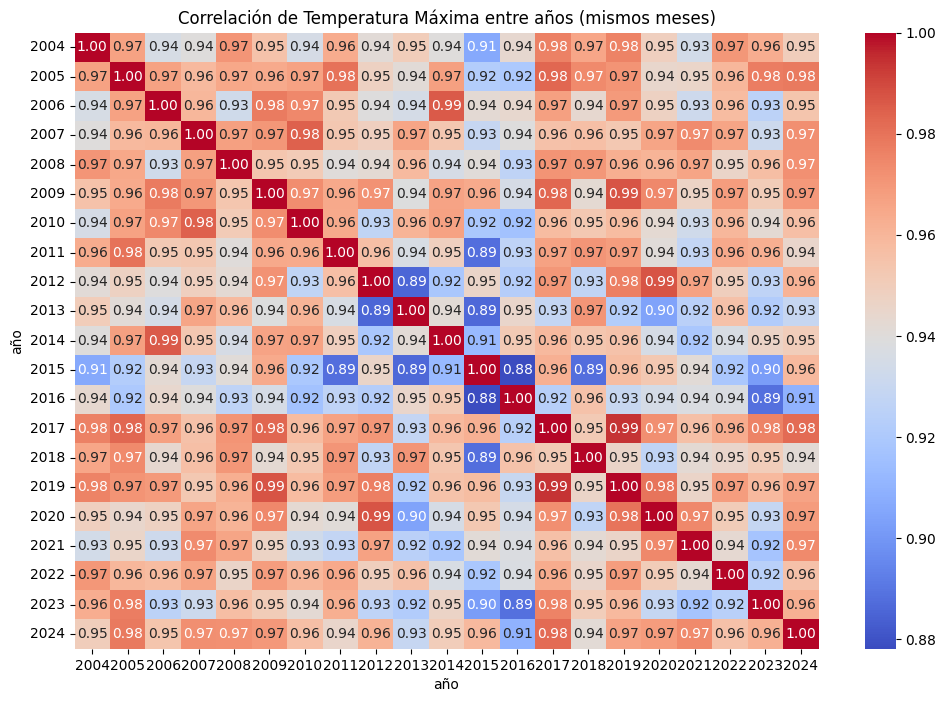


Correlación para Temperatura Mínima:


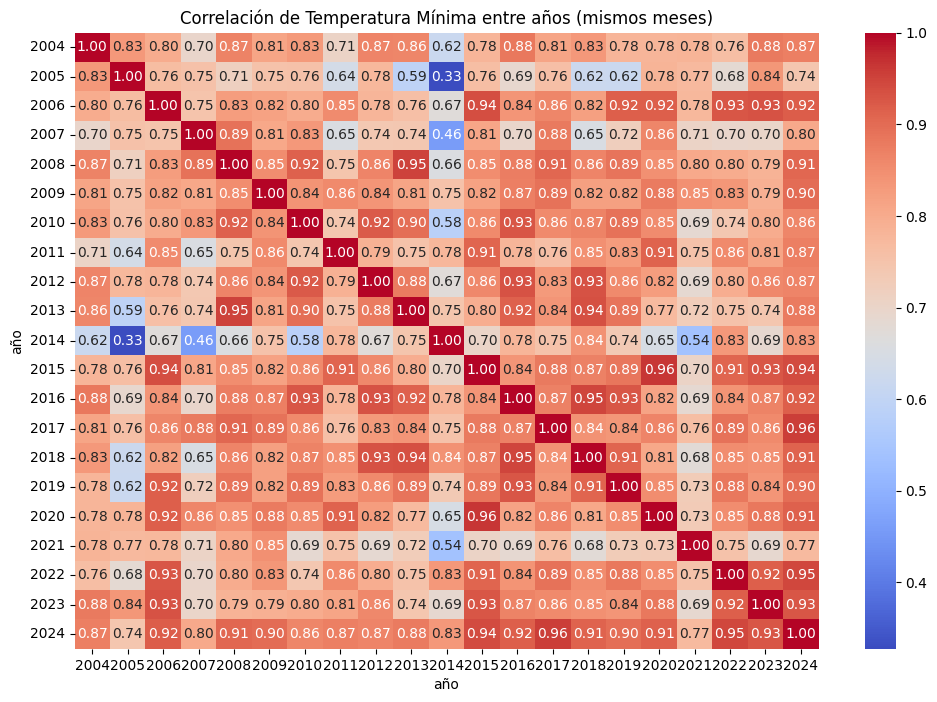


Correlación para Precipitaciones:


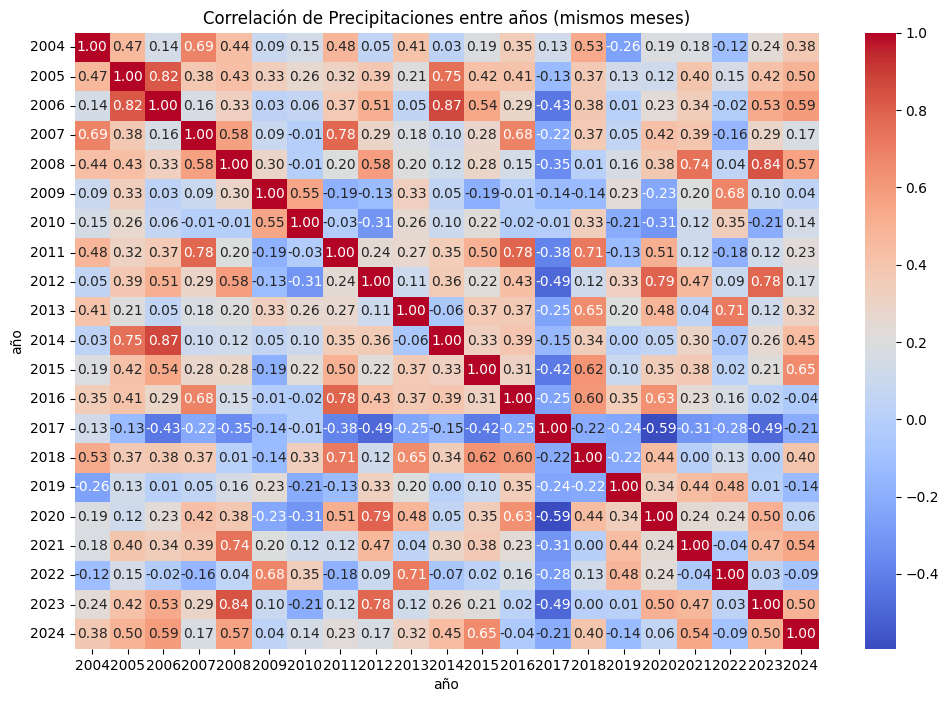

In [ ]:
# 🔹 Convertir en fechas los datos y separarlos en meses y años
datos_madrid['fecha'] = pd.to_datetime(datos_madrid['fecha'], format='%Y-%m')
datos_madrid['Mes'] = datos_madrid['fecha'].dt.month
datos_madrid['Año'] = datos_madrid['fecha'].dt.year

# 🔹 Función de correlación por meses de distintos años
def correlacion_mensual(variable, string):
    # 🔹 Pivoteo de datos
    dt_pivot = datos_madrid.pivot(index='mes', columns='año', values=variable)

    # 🔹 Matriz de correlación
    correlacion = dt_pivot.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlación de {string} entre años (mismos meses)')
    plt.show()
    return correlacion

nombres = {
    'ta_max': 'Temperatura Máxima',
    'ta_min': 'Temperatura Mínima',
    'p_mes': 'Precipitaciones'
}

for col in ['ta_max', 'ta_min', 'p_mes']:
    print(f"\nCorrelación para {nombres[col]}:")
    correlacion_mensual(col, nombres[col])

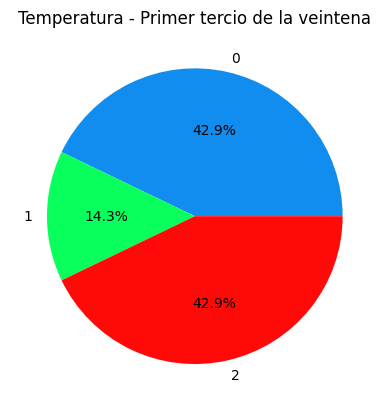

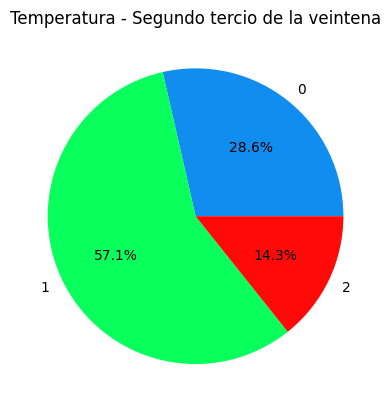

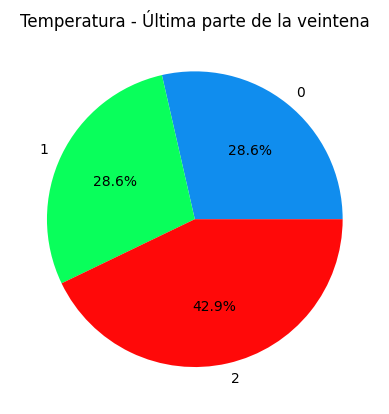

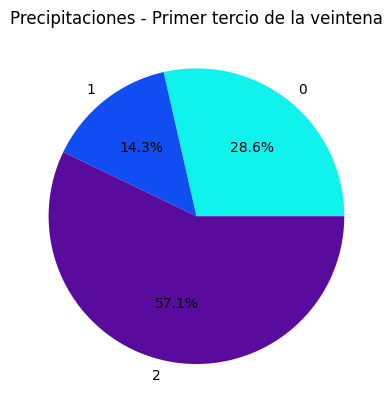

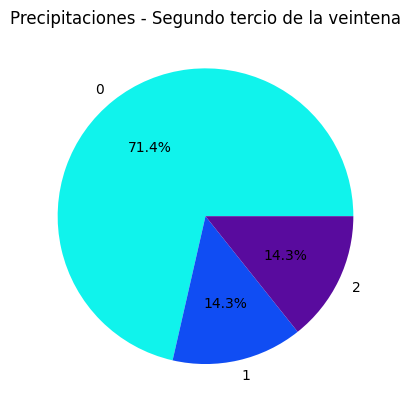

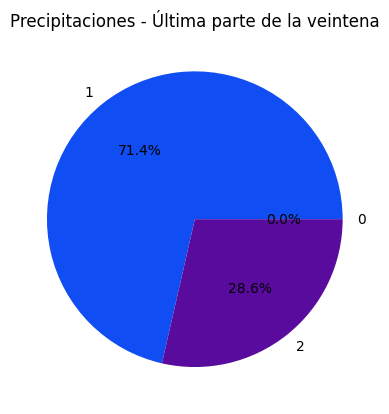

In [ ]:
# Conclusiones y evolución de los datos obtenidos

import matplotlib.pyplot as plt

# Definir los colores fijos para cada clase
colores_personalizados_temp = {0: "#108DEE", 1: "#09FF5B", 2: "#FF0909"}  # azul, verde, rojo
colores_personalizados_rain = {0: "#10F3EC", 1: "#104DF3", 2: "#590B9E"}  # azul claro, azul, morado

# Lista de clases esperadas (0, 1, 2)
all_classes = [0, 1, 2]

# Función que asegura que los conteos tengan todas las clases y estén en el orden correcto
def get_class_counts(series):
    return series.value_counts().reindex(all_classes, fill_value=0)

# Obtener subconjuntos de clases (muestras aleatorias)
# Ordenamos los años cronológicamente
df_yearly_temp_sorted = df_yearly_temp.sort_values("año").reset_index(drop=True)
df_yearly_rain_sorted = df_yearly_rain.sort_values("año").reset_index(drop=True)

# Número total de años
n = len(df_yearly_temp_sorted)

# División en tres partes iguales (o casi iguales)
tercio = n // 3

# Subconjuntos cronológicos
subset_1_temp = df_yearly_temp_sorted.iloc[:tercio]["Clase Temperatura"]
subset_2_temp = df_yearly_temp_sorted.iloc[tercio:2*tercio]["Clase Temperatura"]
subset_3_temp = df_yearly_temp_sorted.iloc[2*tercio:]["Clase Temperatura"]

subset_1_rain = df_yearly_rain_sorted.iloc[:tercio]["Clase Lluvia"]
subset_2_rain = df_yearly_rain_sorted.iloc[tercio:2*tercio]["Clase Lluvia"]
subset_3_rain = df_yearly_rain_sorted.iloc[2*tercio:]["Clase Lluvia"]

# Obtener conteos ordenados
temperaturas_count_1 = get_class_counts(subset_1_temp)
temperaturas_count_2 = get_class_counts(subset_2_temp)
temperaturas_count_3 = get_class_counts(subset_3_temp)

precipitaciones_count_1 = get_class_counts(subset_1_rain)
precipitaciones_count_2 = get_class_counts(subset_2_rain)
precipitaciones_count_3 = get_class_counts(subset_3_rain)

# Obtener lista de colores ordenada
colores_temp = [colores_personalizados_temp[i] for i in all_classes]
colores_rain = [colores_personalizados_rain[i] for i in all_classes]

# ---------- Gráficos de Temperatura ----------
fig, ax = plt.subplots()
ax.pie(temperaturas_count_1, labels=temperaturas_count_1.index, autopct='%1.1f%%', colors=colores_temp)
plt.title("Temperatura - Primer tercio de la veintena")
plt.show()

fig, ax = plt.subplots()
ax.pie(temperaturas_count_2, labels=temperaturas_count_2.index, autopct='%1.1f%%', colors=colores_temp)
plt.title("Temperatura - Segundo tercio de la veintena")
plt.show()

fig, ax = plt.subplots()
ax.pie(temperaturas_count_3, labels=temperaturas_count_3.index, autopct='%1.1f%%', colors=colores_temp)
plt.title("Temperatura - Última parte de la veintena")
plt.show()

# ---------- Gráficos de Precipitaciones ----------
fig, ax = plt.subplots()
ax.pie(precipitaciones_count_1, labels=precipitaciones_count_1.index, autopct='%1.1f%%', colors=colores_rain)
plt.title("Precipitaciones - Primer tercio de la veintena")
plt.show()

fig, ax = plt.subplots()
ax.pie(precipitaciones_count_2, labels=precipitaciones_count_2.index, autopct='%1.1f%%', colors=colores_rain)
plt.title("Precipitaciones - Segundo tercio de la veintena")
plt.show()

fig, ax = plt.subplots()
ax.pie(precipitaciones_count_3, labels=precipitaciones_count_3.index, autopct='%1.1f%%', colors=colores_rain)
plt.title("Precipitaciones - Última parte de la veintena")
plt.show()




<Figure size 1500x700 with 0 Axes>

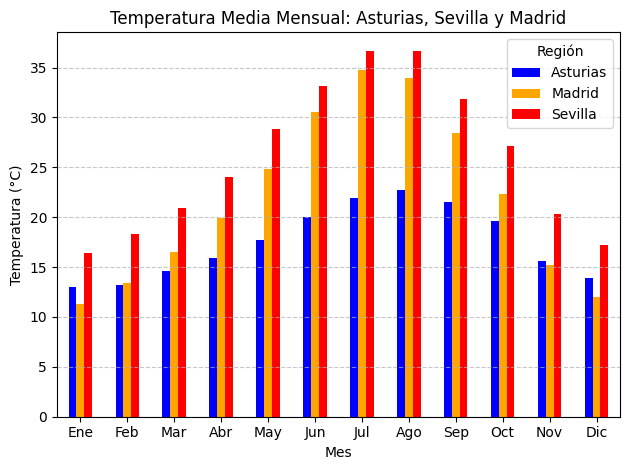

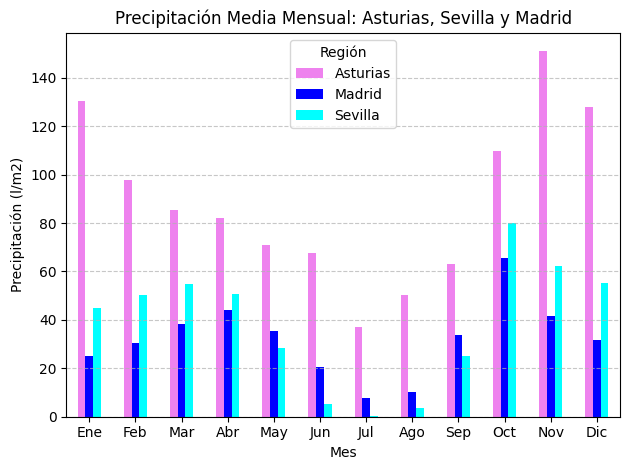

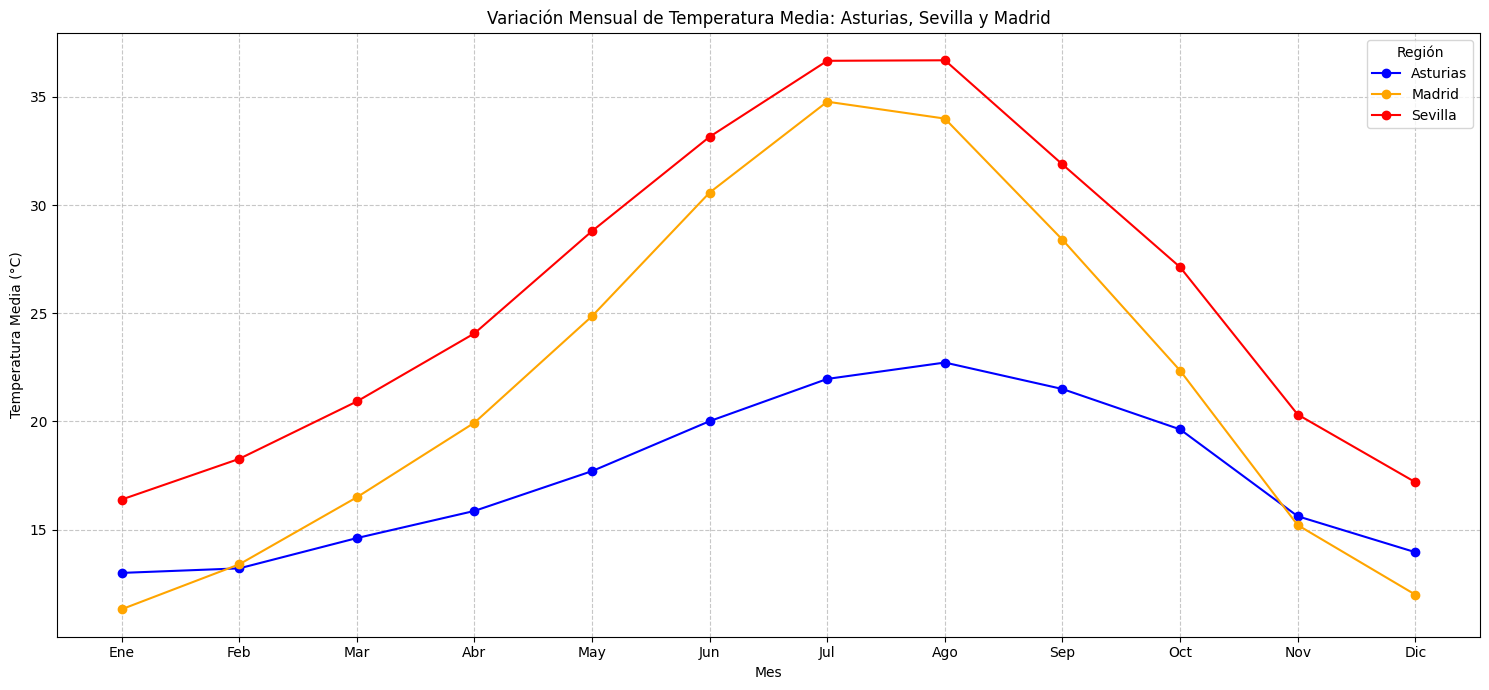

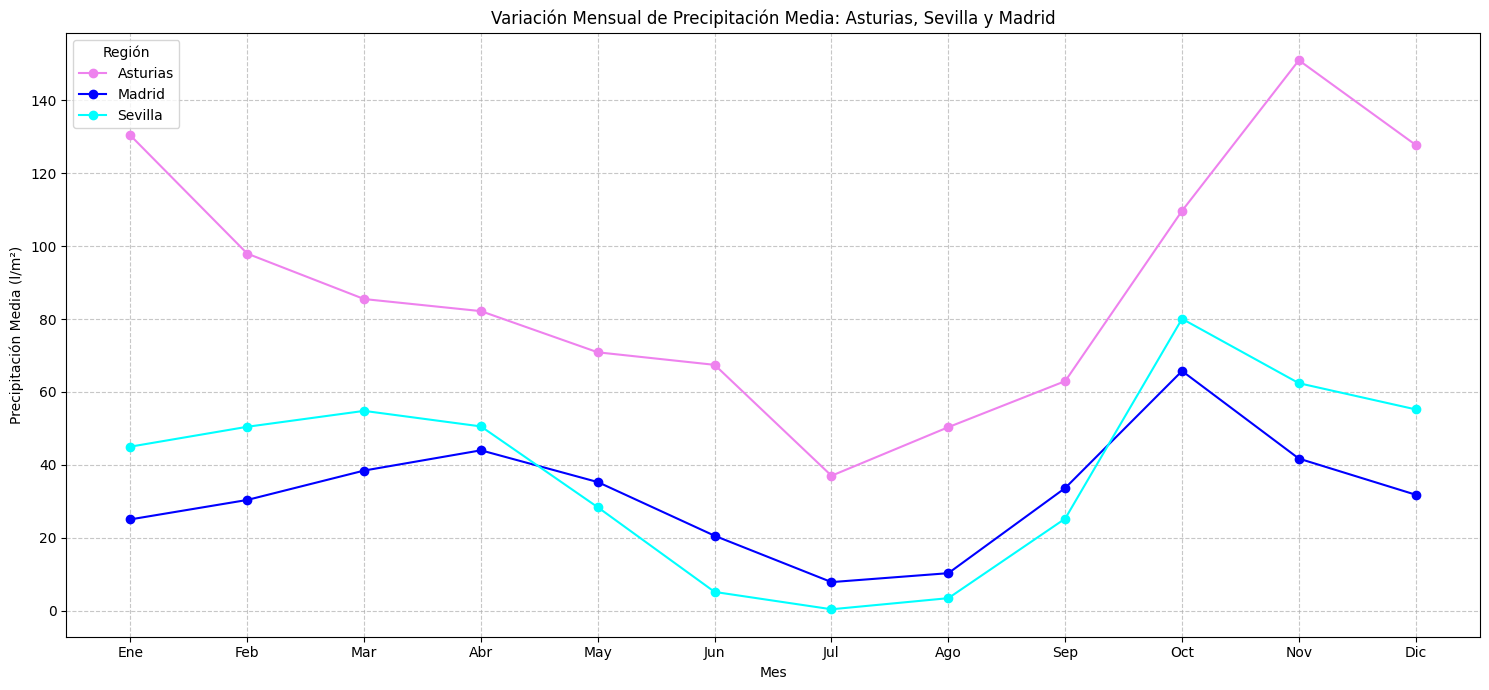

In [ ]:
import matplotlib.pyplot as plt


datos_combinados = pd.concat([datos_asturias, datos_sevilla, datos_madrid], ignore_index=True)

# 🔹 Calcula el promedio mensual por región
promedio_mensual = datos_combinados.groupby(["mes", "region"], as_index=False)["tm_max"].mean()
datos_combinados["p_mes"] = pd.to_numeric(datos_combinados["p_mes"], errors="coerce")
promedio_precipitacion = datos_combinados.groupby(["mes", "region"], as_index=False)["p_mes"].mean()

# 🔹 Crea una tabla pivotante para la gráfica
pivot_df = promedio_mensual.pivot(index="mes", columns="region", values="tm_max")           # temperaturas
pivot_rf = promedio_precipitacion.pivot(index="mes", columns="region", values="p_mes")      # precipitaciones

# 🔹 Configura la gráfica
plt.figure(figsize=(15, 7))
pivot_df.plot(kind="bar", color=["blue", "orange", "red"])
plt.title("Temperatura Media Mensual: Asturias, Sevilla y Madrid")
plt.xlabel("Mes")
plt.ylabel("Temperatura (°C)")
plt.xticks(range(12), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], rotation=0)
plt.legend(title="Región")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

pivot_rf.plot(kind="bar", color=["violet", "blue", "aqua"])
plt.title("Precipitación Media Mensual: Asturias, Sevilla y Madrid")
plt.xlabel("Mes")
plt.ylabel("Precipitación (l/m2)")
plt.xticks(range(12), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], rotation=0)
plt.legend(title="Región")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 🔹 Gráfico de líneas para temperatura
colores_temp = {
    "Sevilla": "red",
    "Madrid": "orange",
    "Asturias": "blue"
}

plt.figure(figsize=(15, 7))
for region in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[region], marker='o', label=region, color=colores_temp[region])

plt.title("Variación Mensual de Temperatura Media: Asturias, Sevilla y Madrid")
plt.xlabel("Mes")
plt.ylabel("Temperatura Media (°C)")
plt.xticks(range(1, 13), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], rotation=0)
plt.legend(title="Región")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 🔹 Gráfico de líneas para precipitación
colores_lluv = {
    "Sevilla": "aqua",
    "Madrid": "blue",
    "Asturias": "violet"
}
plt.figure(figsize=(15, 7))
for region in pivot_rf.columns:
    plt.plot(pivot_rf.index, pivot_rf[region], marker='o', label=region, color=colores_lluv[region])

plt.title("Variación Mensual de Precipitación Media: Asturias, Sevilla y Madrid")
plt.xlabel("Mes")
plt.ylabel("Precipitación Media (l/m²)")
plt.xticks(range(1, 13), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], rotation=0)
plt.legend(title="Región")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
